In [1]:
import numpy as np
import networkx as nx
from networkx.algorithms.community import k_clique_communities
from os import path
import pickle

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

In [60]:
datadir = 'dataset'
sz_clique = 8
edge_th = 2

In [3]:
nodes = []
kw2v = dict()
edges = []

with open(path.join(datadir, 'AMiner-Author.txt'), 'r') as fin:
    for i,l in enumerate(fin):
        if l.startswith('#index '):
            idx = int(l[7:])
            nodes.append(idx)
        if l.startswith('#t '):
            kws_ = set([kw.strip().lower() for kw in l[3:].split(';')])
            for kw in kws_:
                if kw not in kw2v:
                    kw2v[kw] = set()
                kw2v[kw].add(idx)
        if i % 5000000 == 0: print(i)

0
5000000
10000000
15000000


In [5]:
with open(path.join(datadir, 'AMiner-Coauthor.txt'), 'r') as fin:
    for l in fin:
        if not l.startswith('#'):
            continue
        v1,v2,cnt = l[1:].split()
        if int(cnt) >= edge_th:
            edges.append((int(v1),int(v2)))

In [34]:
print(len(nodes))
print(len(edges))
print(len(kw2v))

1712433
970484
3901018


In [61]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [62]:
coms = list(k_clique_communities(G, sz_clique))
coms = [set(c) for c in coms]

In [63]:
coms_ = []
for c in coms:
    coms_.append(set([int(v) for v in c]))
coms = coms_

In [64]:
nodes_c = set.union(*[set(c) for c in coms])
nodes_c = set([int(v) for v in nodes_c])
edges_c = [e for e in edges if e[0] in nodes_c and e[1] in nodes_c]
kw2v_c = dict()

with open(path.join(datadir, 'AMiner-Author.txt'), 'r') as fin:
    for i,l in enumerate(fin):
        if l.startswith('#index '):
            idx = int(l[7:])
        if l.startswith('#t '):
            if idx not in nodes_c: continue
            kws_ = set([kw.strip().lower() for kw in l[3:].split(';')])
            for kw in kws_:
                if kw not in kw2v_c:
                    kw2v_c[kw] = set()
                kw2v_c[kw].add(idx)

In [65]:
# Node to Community
v2c = dict()
for i,v in enumerate(nodes_c):
    ls = list()
    for j,c in enumerate(coms):
        if v in c: ls.append(j)
    v2c[v] = ls

In [66]:
kws = [k for k,v in kw2v_c.items()]
kw2c = []
for i,k in enumerate(kws):
    cls = []
    for v in kw2v_c[k]:
        cls.append(v2c[v])
    kw2c.append(set(np.concatenate(cls)))

In [67]:
G_c = nx.Graph()
G_c.add_nodes_from(nodes_c)
G_c.add_edges_from(edges_c)

In [68]:
cls2vec = []
for c in range(len(coms)):
    vecs = [i if c in clss else -1 for i,clss in enumerate(kw2c)]
    vecs = list(filter(lambda x: x!=-1, vecs))
    cls2vec.append(np.array(vecs))

In [69]:
with open(path.join(datadir, 'aminer-communities-k{}-w{}.pkl'.format(sz_clique, edge_th)), 'wb') as fout:
    #pickle.dump([nodes, kw2v, kws, edges], fout)
    #pickle.dump([nodes_c, kw2v_c, edges_c, coms], fout)
    pickle.dump([nodes_c, kws, kw2c, kw2v_c, coms, cls2vec], fout)

# K5, W2

In [57]:
print(len(coms))
print(len(nodes_c))
print(len(edges_c))
print(len(kw2v_c))

18121
88692
366823
285700


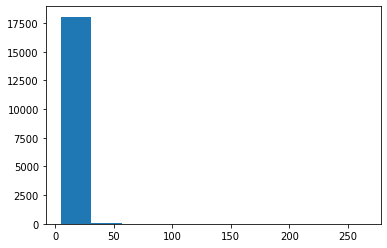

In [58]:
plt.hist([len(c) for c in coms])
plt.show()

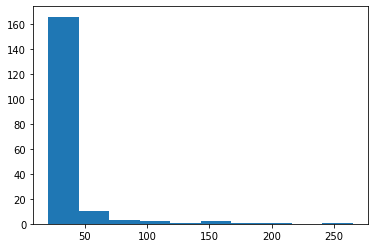

In [59]:
plt.hist([len(c) for c in coms if len(c) > 20])
plt.show()

# K8, W2

In [70]:
print(len(coms))
print(len(nodes_c))
print(len(edges_c))
print(len(kw2v_c))

1674
15023
88960
53056


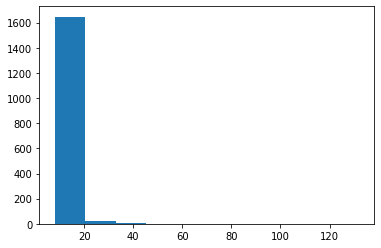

In [71]:
plt.hist([len(c) for c in coms])
plt.show()

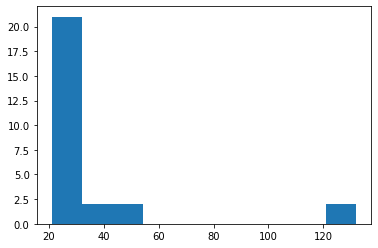

In [72]:
plt.hist([len(c) for c in coms if len(c) > 20])
plt.show()

# K10, W2

In [16]:
print(len(coms))
print(len(nodes_c))
print(len(edges_c))
print(len(kw2v_c))

544
6529
49031
23827


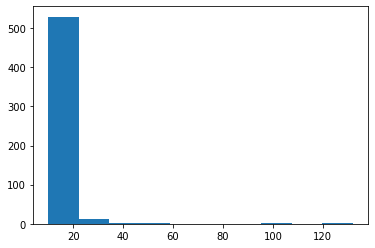

In [17]:
plt.hist([len(c) for c in coms])
plt.show()

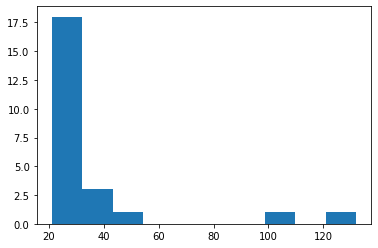

In [18]:
plt.hist([len(c) for c in coms if len(c) > 20])
plt.show()

In [19]:
pos = nx.spring_layout(G_c)
nx.draw(G_c, pos, edge_color='k', node_size=25, width=0.3)

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
norm = matplotlib.colors.Normalize(vmin=0, vmax=len(coms), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.rainbow)
for i,c in enumerate(coms):
    nx.draw_networkx_nodes(G_c, pos, nodelist=list(c), 
                           node_size=25, node_color=mapper.to_rgba(i))

plt.show()

KeyboardInterrupt: 

# K15, W2

In [44]:
print(len(coms))
print(len(nodes_c))
print(len(edges_c))
print(len(kw2v_c))

79
1571
20482
5432


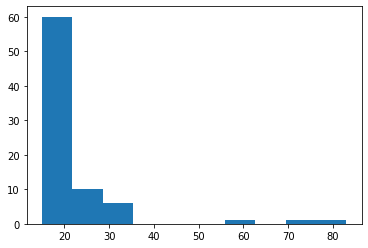

In [45]:
plt.hist([len(c) for c in coms])
plt.show()

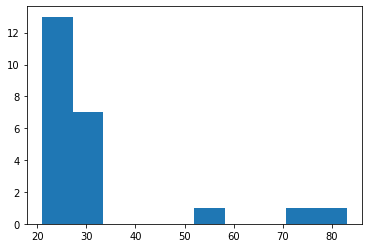

In [46]:
plt.hist([len(c) for c in coms if len(c) > 20])
plt.show()

# K10

In [15]:
print(len(coms))
print(len(nodes_c))
print(len(edges_c))
print(len(kw2v_c))

6472
69884
616074
190266


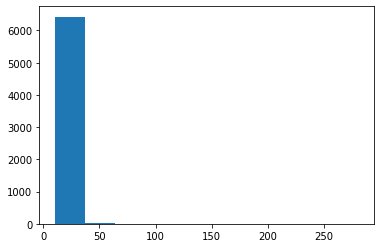

In [16]:
plt.hist([len(c) for c in coms])
plt.show()

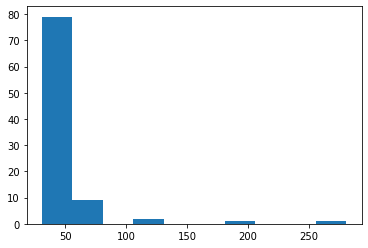

In [17]:
plt.hist([len(c) for c in coms if len(c) > 30])
plt.show()

In [ ]:
pos = nx.spring_layout(G_c)
nx.draw(G_c, pos, edge_color='k', node_size=25, width=0.3)

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
norm = matplotlib.colors.Normalize(vmin=0, vmax=len(coms), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.rainbow)
for i,c in enumerate(coms):
    nx.draw_networkx_nodes(G_c, pos, nodelist=list(c), 
                           node_size=25, node_color=mapper.to_rgba(i))

plt.show()

# K20

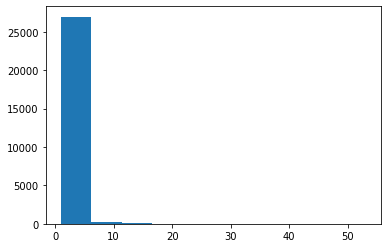

In [95]:
plt.hist([len(c) for c in kw2c])
plt.show()

In [19]:
print(len(coms))

362


In [51]:
for c in coms:
    if len(c)>50:
        print(len(c))

179
65
168
51
55
63
88
59
52
51
102


In [68]:
tmp = np.concatenate([list(c) for c in coms])
print(len(tmp))
from collections import Counter

[v for k,v in Counter(tmp).items() if v>2]

9831


[3,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 4,
 3,
 4,
 3,
 3,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 5]

In [45]:
print(len(nodes_c))
print(len(edges_c))
print(len(kw2v_c))

9176
153670
27304


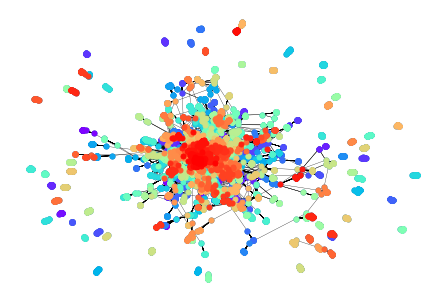

In [60]:
#pos = nx.spring_layout(G_c)
nx.draw(G_c, pos, edge_color='k', node_size=25, width=0.3)

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
norm = matplotlib.colors.Normalize(vmin=0, vmax=len(coms), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.rainbow)
for i,c in enumerate(coms):
    nx.draw_networkx_nodes(G_c, pos, nodelist=list(c), 
                           node_size=25, node_color=mapper.to_rgba(i))

plt.show()

/work/modules/Ubuntu/14.04/amd64/common/anaconda3/latest/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


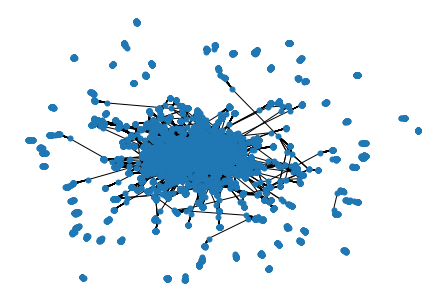

In [49]:
nx.draw(G_c, with_labels=False, node_size=25)

/work/modules/Ubuntu/14.04/amd64/common/anaconda3/latest/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


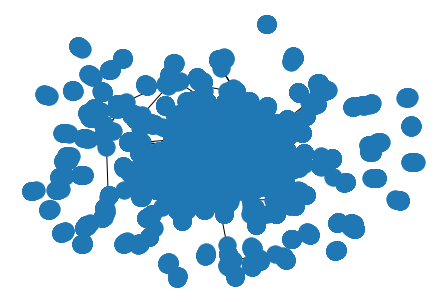

In [31]:
nx.draw(G_c, with_labels=False)

In [ ]:
nx.draw(G, with_labels=False)